# PySpark. Analysis. My code from Zeppelin notebook.

In [ ]:
%pyspark

events_df = spark.read \
    .option("inferSchema", "true") \
    .option("header", "true") \
    .csv("data/events.csv")

events_df \
    .write.mode("overwrite") \
    .format("parquet") \
    .save("data/events.parquet")
events_df.show(5)

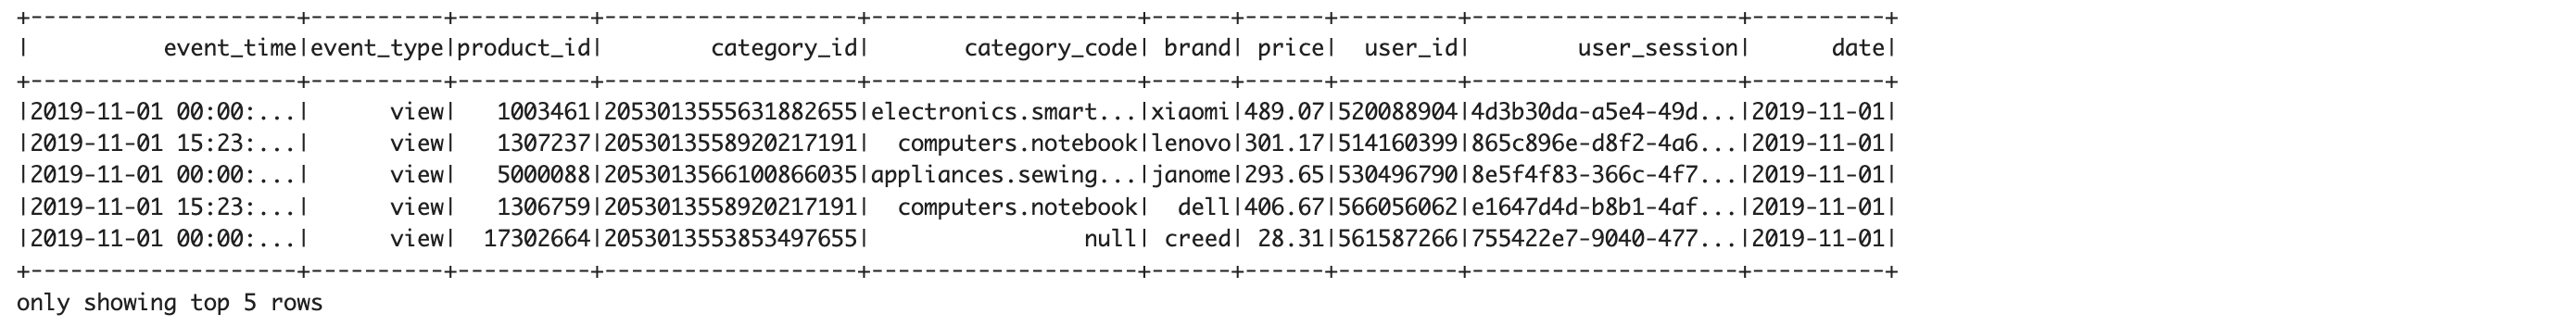

### Hourly sales chart for all time.

In [ ]:
%pyspark

z.show(
    events_df \
    .withColumn("event_time", f.to_timestamp(f.col("event_time"), 'yyyy-MM-dd HH:mm:ss')) \
    .withColumn("event_time_round_hour", f.date_trunc("hour", f.col("event_time"))) \
    .filter(f.col("event_type") == 'purchase') \
    .groupBy("event_time_round_hour") \
    .agg(
        f.count("").alias("count_purchase_hourly")
        ) \
    .orderBy(f.col("event_time_round_hour"))
)

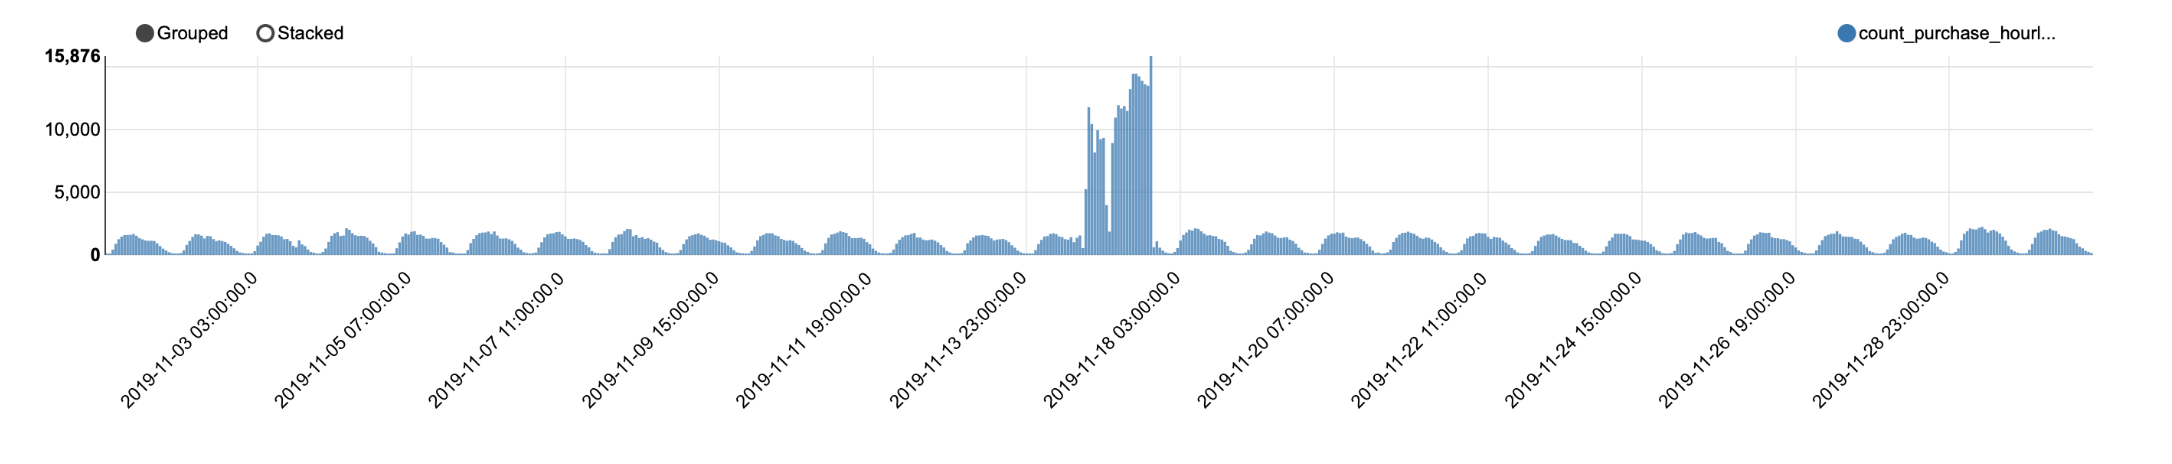

### Average daily sales schedule.

In [ ]:
%pyspark

z.show(
    events_df \
        .withColumn("event_time", f.to_timestamp(f.col("event_time"), 'yyyy-MM-dd HH:mm:ss')) \
        .withColumn("event_time_hour", f.hour("event_time")) \
        .filter(f.col("event_type") == 'purchase') \
        .groupBy("event_time_hour") \
            .agg(
                (f.count("*") / f.countDistinct("date")).alias("count_purchase_daily")
             ) \
        .orderBy(f.col("event_time_hour"))
)

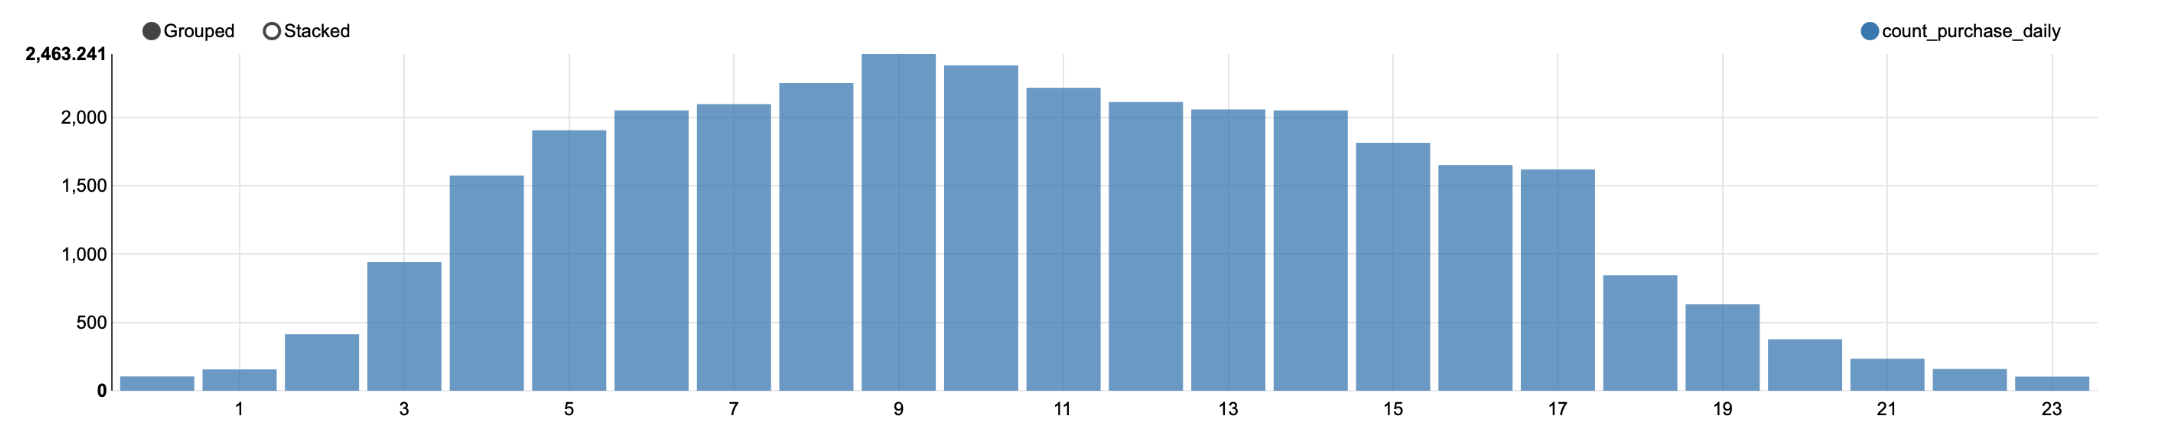

### Histogram of the distribution of prices for goods sold for November 10, 2019

In [ ]:
%pyspark

z.show(
    events_df \
    .filter(f.col("event_type") == 'purchase') \
    .filter(f.col("date") == '2019-11-10') \
    .select(f.round(f.col("price"),-1).alias("round_price")) \
    .groupBy("round_price") \
    .agg(
        f.count("*").alias("count_price_tag")
        ) \
    .orderBy(f.col("round_price"))
)

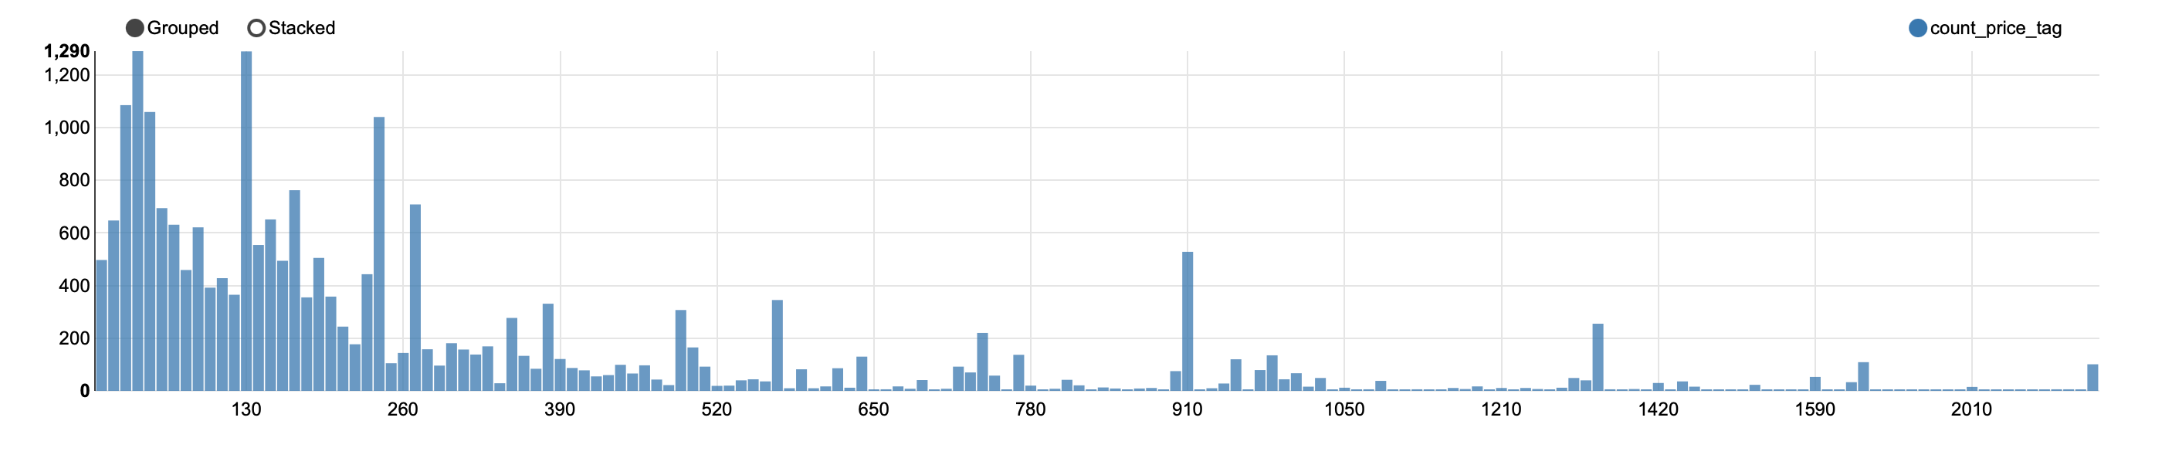

### Top 5 categories by number of product views of all time

In [ ]:
%pyspark

events_df = spark.table("market.events")
events_df \
    .filter(f.col("event_type") == "view") \
    .groupBy("category_code") \
    .agg(
        f.count("*").alias("view_count")
        ) \
    .orderBy(f.col("view_count").desc()) \
    .show(5, truncate=False)

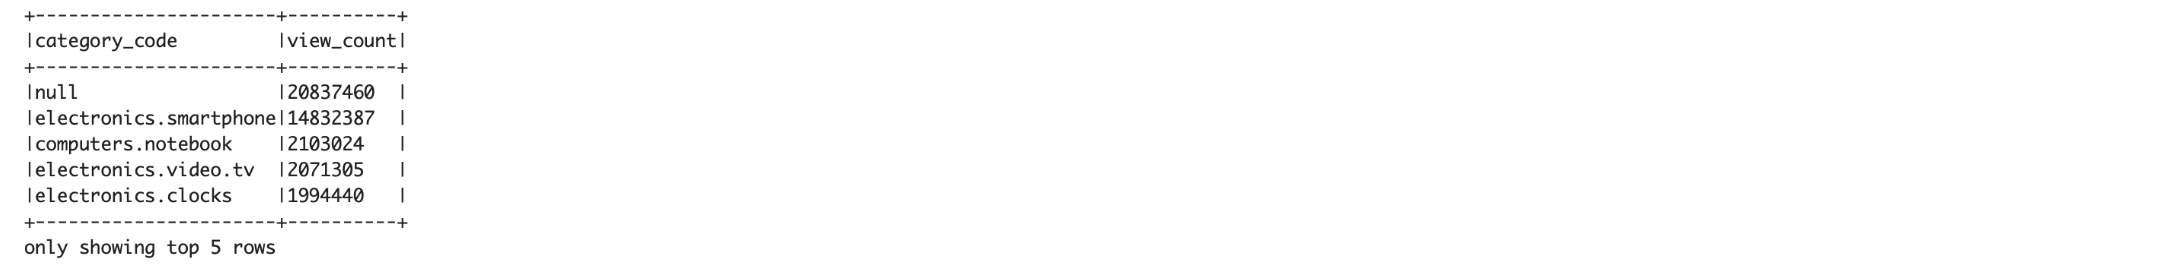

### The number of sales separately for the apple brand and others

In [ ]:
%pyspark
events_new_df \
    .withColumn("is_apple", f.when(f.col("brand") == "apple","true")
                                 .when(f.col("brand") != "apple","false")
                                 .when(f.col("brand").isNull() ,"false")
                                 .otherwise(f.col("brand"))) \
    .filter(f.col("event_type") == 'purchase') \
    .groupBy("is_apple") \
    .agg(
        f.count("*").alias("sum")
        ) \
    .orderBy(f.col("sum")) \
    .show(truncate=False)

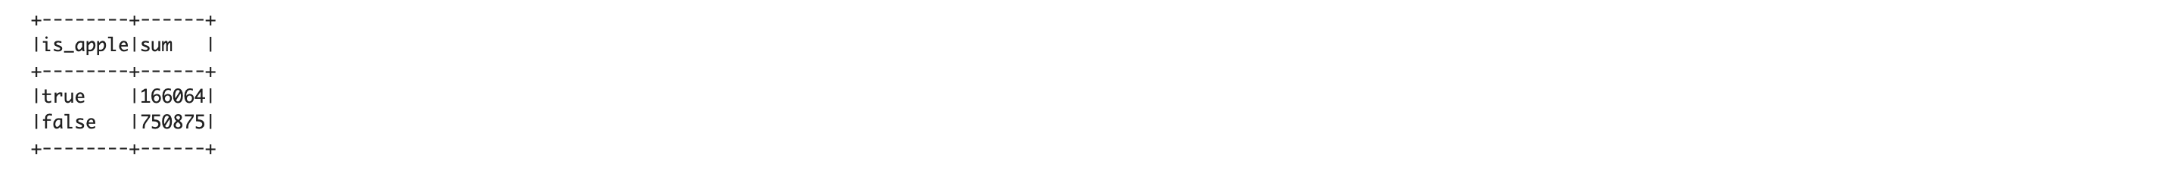